In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=bg-ngts----bg-tso-0001entrystorage,bg-ngts----bg-tso-0001exitfinal%20consumers,bg-ngts----bg-tso-0001exitstorage,bg-ngts----bg-tso-0001entrytransmissiongr---------,bg-ngts----bg-tso-0001entrytransmissionro---------,bg-ngts----bg-tso-0001exittransmission,bg-ngts----bg-tso-0001exittransmissiongr---------,bg-ngts----bg-tso-0001entrytransmission,bg-ngts----bg-tso-0001entrytransmissionro-tbp-----,bg-ngts----bg-tso-0001exittransmissionro---------,bg-ngts----bg-tso-0001exittransmissionro-tbp-----,bg-ngts----bg-tso-0001entry&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesBGBG-NGTS----BG-TSO-0001entryStorag...        1   Aggregates   
1    1AggregatesBGBG-NGTS----BG-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesBGBG-NGTS----BG-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesBGBG-NGTS----BG-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesBGBG-NGTS----BG-TSO-0001entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
336  1AggregatesBGBG-NGTS----BG-TSO-0001exitStorage...        1   Aggregates   
337  1AggregatesBGBG-NGTS----BG-TSO-0001exitTransmi...        1   Aggregates   
338  1AggregatesBGBG-NGTS----BG-TSO-0001exitTransmi...        1   Aggregates   
339  1AggregatesBGBG-NGTS----BG-TSO-0001exitTransmi...        1   Aggregates   
340  1AggregatesBGBG-NGTS----BG-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day      value
0          entry    2    8648933
1          entry    2  427572955
2          entry    2          0
3          entry    2          0
4          entry    2          0
..           ...  ...        ...
336         exit    1          0
337         exit    1    2468350
338         exit    1   45084232
339         exit    1   47318246
340         exit    1          0

[341 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         6.775474e+07
    exit          2.870320e+07
2   entry         8.724438e+07
    exit          7.153728e+07
3   entry         8.708175e+07
...                        ...
29  exit          6.855577e+07
30  entry         8.230447e+07
    exit          3.569432e+07
31  entry         8.039950e+07
    exit          3.428800e+07

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

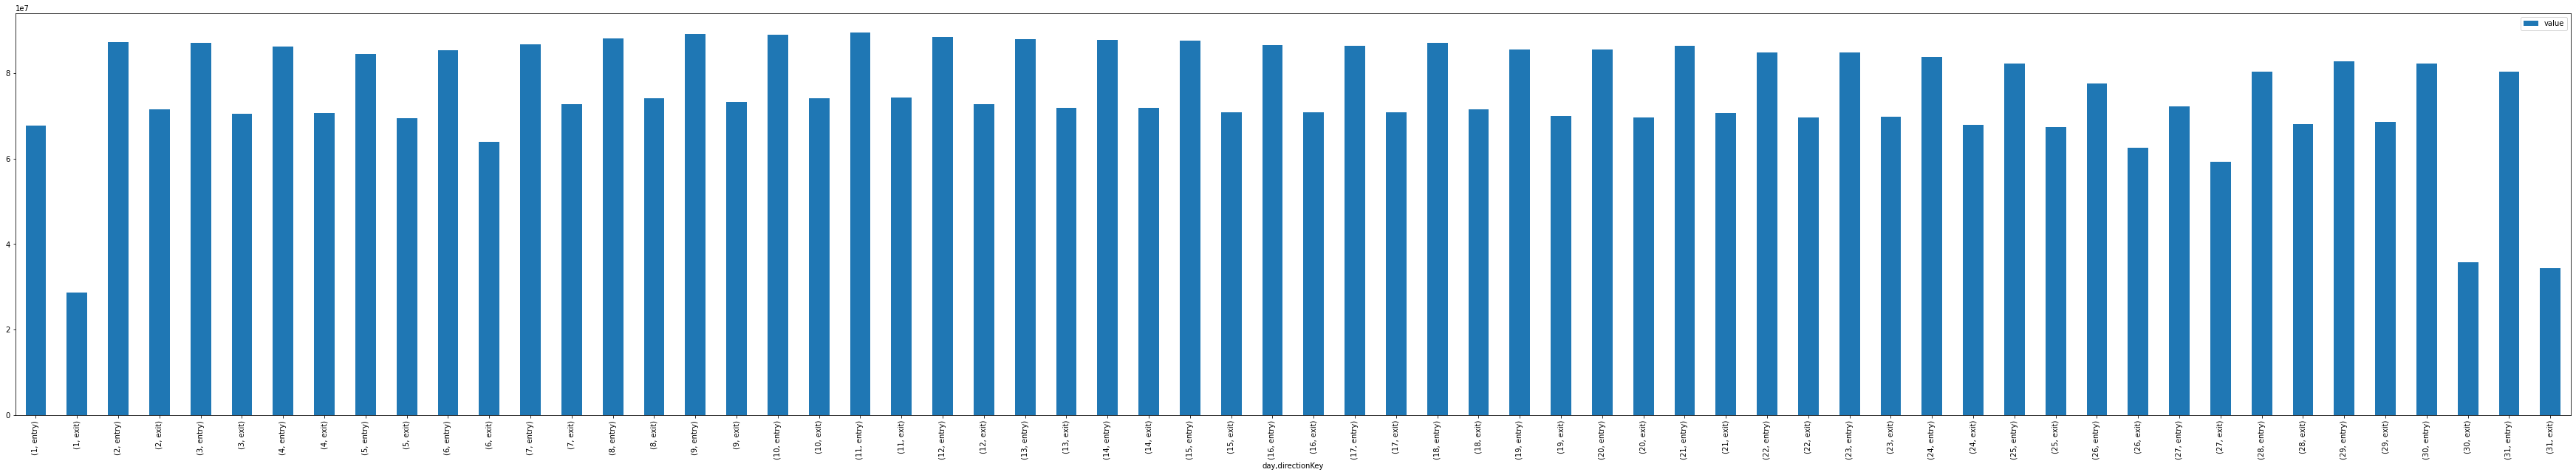

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))